In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

adult = pd.read_csv("adult_with_pii.csv")
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

In [16]:
def range_query(df, col, a ,b):
    return len(df[ (df[col] >= a) & (df[col] < b) ])

In [17]:
range_query(adult, 'Age', 21, 33)

6245

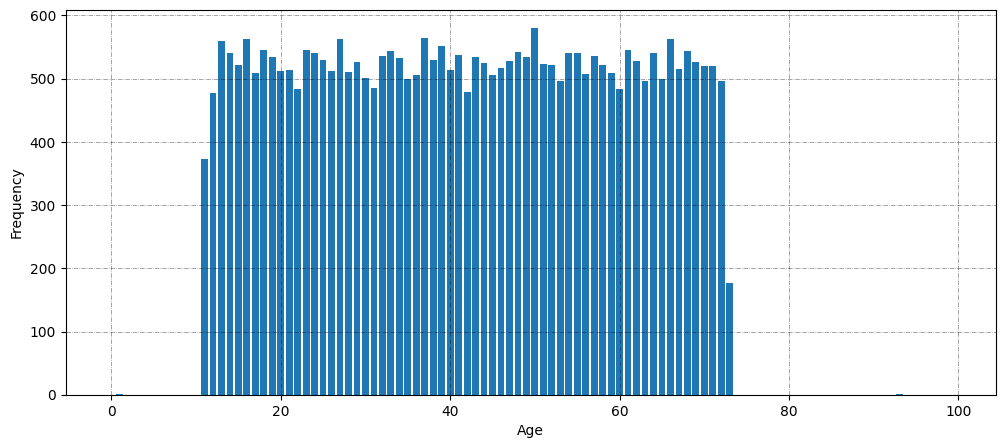

In [34]:
bins = list(range(0, 100))
counts = [range_query(adult, 'Age', b, b+1) for b in bins]

plt.figure(figsize=(12, 5), facecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.bar(bins, counts)
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')

In [35]:
def range_query_synth(syn_rep, a, b):
    total = 0
    for i in range(a, b):
        total += syn_rep[i]
    return total

In [36]:
range_query_synth(counts, 21, 33)

6245

In [37]:
#to add differential privacy to the synthetic representation we can add a Laplacian noise to each count bin in the histogram
#satisfying epsilon-differential privacy by parallel composition.

epsilon = 1
dp_syn_rep = [laplace_mech(c, 1, epsilon) for c in counts]

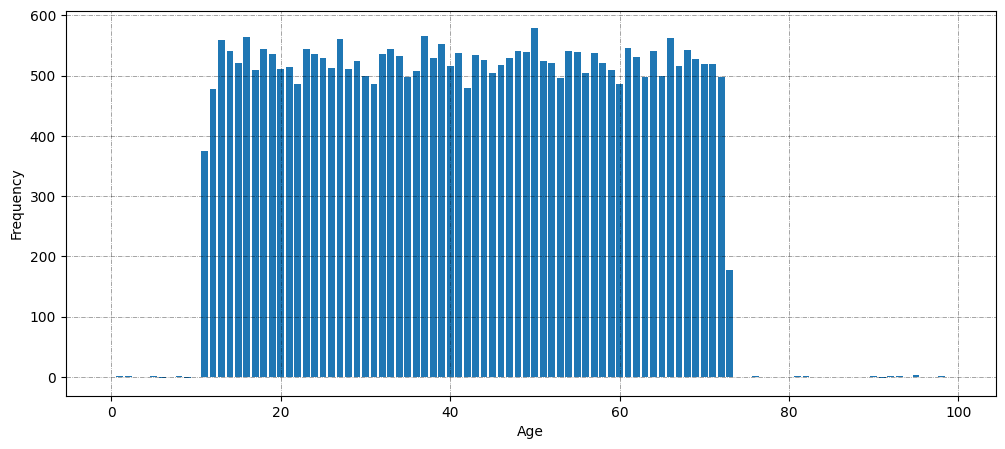

In [41]:
bins = range(0, 100)

plt.figure(figsize=(12, 5), facecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.bar(bins, dp_syn_rep)
plt.grid(True, linestyle='-.', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')

In [42]:
range_query_synth(dp_syn_rep, 21, 33)

6237.273005644805

In [43]:
true_answer = range_query(adult, 'Age', 30, 31)
print('Synthetic representation error: {}'.format(pct_error(true_answer, range_query_synth(dp_syn_rep, 30, 31))))
print('Laplace mechanism error: {}'.format(pct_error(true_answer, laplace_mech(true_answer, 1, epsilon))))

Synthetic representation error: 0.21591954628420834
Laplace mechanism error: 0.2615876313323591


In [44]:
true_answer = range_query(adult, 'Age', 30, 71)
print('Synthetic representation error: {}'.format(pct_error(true_answer, range_query_synth(dp_syn_rep, 30, 71))))
print('Laplace mechanism error: {}'.format(pct_error(true_answer, laplace_mech(true_answer, 1, epsilon))))

Synthetic representation error: 0.00666651176192302
Laplace mechanism error: 0.00010296884252425118


In [53]:
#non negative
dp_syn_rep_nn = np.clip(dp_syn_rep, 0, None)
#normalization
syn_normalized = dp_syn_rep_nn/np.sum(dp_syn_rep_nn)

In [46]:
dp_syn_rep_nn

array([1.12135338e-01, 9.24880530e-01, 1.53643297e+00, 5.68679931e-01,
       4.07240579e-02, 9.21833473e-01, 0.00000000e+00, 0.00000000e+00,
       7.86952598e-01, 0.00000000e+00, 2.03177675e-02, 3.74559976e+02,
       4.77815276e+02, 5.58389464e+02, 5.40711791e+02, 5.20942870e+02,
       5.64868125e+02, 5.09919188e+02, 5.44754766e+02, 5.35415989e+02,
       5.11182067e+02, 5.14300204e+02, 4.86030564e+02, 5.44416010e+02,
       5.35477148e+02, 5.28420093e+02, 5.11925406e+02, 5.60957841e+02,
       5.11689840e+02, 5.23442291e+02, 4.99918243e+02, 4.85222961e+02,
       5.35472404e+02, 5.44359050e+02, 5.33323057e+02, 4.97591052e+02,
       5.07978040e+02, 5.66058495e+02, 5.28692116e+02, 5.51718637e+02,
       5.15954193e+02, 5.36774992e+02, 4.79299471e+02, 5.33777009e+02,
       5.25260581e+02, 5.03574731e+02, 5.17582274e+02, 5.29054620e+02,
       5.40231706e+02, 5.38448229e+02, 5.78621364e+02, 5.23663433e+02,
       5.20928158e+02, 4.95513052e+02, 5.41191730e+02, 5.39382048e+02,
      

In [49]:
syn_normalized

array([3.44278677e-06, 2.83957448e-05, 4.71716692e-05, 1.74596498e-05,
       1.25031279e-06, 2.83021938e-05, 0.00000000e+00, 0.00000000e+00,
       2.41610720e-05, 0.00000000e+00, 6.23797475e-07, 1.14997658e-02,
       1.46699170e-02, 1.71437112e-02, 1.66009701e-02, 1.59940233e-02,
       1.73426195e-02, 1.56555735e-02, 1.67250978e-02, 1.64383780e-02,
       1.56943465e-02, 1.57900797e-02, 1.49221433e-02, 1.67146972e-02,
       1.64402557e-02, 1.62235895e-02, 1.57171685e-02, 1.72225657e-02,
       1.57099362e-02, 1.60707607e-02, 1.53485238e-02, 1.48973483e-02,
       1.64401101e-02, 1.67129485e-02, 1.63741207e-02, 1.52770742e-02,
       1.55959762e-02, 1.73791663e-02, 1.62319412e-02, 1.69389030e-02,
       1.58408606e-02, 1.64801022e-02, 1.47154849e-02, 1.63880579e-02,
       1.61265860e-02, 1.54607856e-02, 1.58908461e-02, 1.62430708e-02,
       1.65862305e-02, 1.65314740e-02, 1.77648724e-02, 1.60775502e-02,
       1.59935716e-02, 1.52132753e-02, 1.66157052e-02, 1.65601442e-02,
      

In [50]:
np.sum(syn_normalized)

np.float64(1.0)

<BarContainer object of 100 artists>

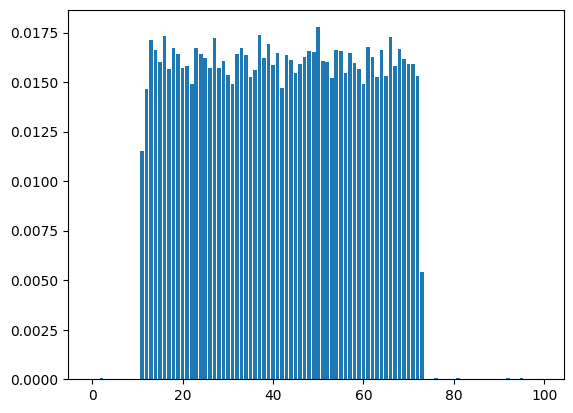

In [52]:
plt.bar(bins, syn_normalized)

In [54]:
def gen_samples(n):
    return np.random.choice(bins, n, p=syn_normalized)

In [155]:
syn_data = pd.DataFrame(gen_samples(5), columns = ['Age'])
syn_data

,Age
0,71
1,55
2,22
3,17
4,52


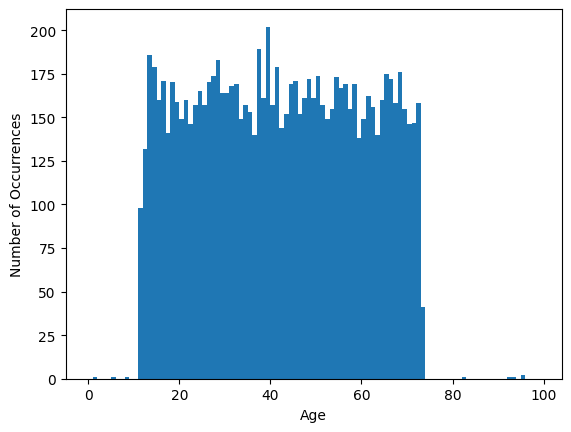

In [156]:
syn_data = pd.DataFrame(gen_samples(10000), columns=['Age'])
plt.xlabel('Age')
plt.ylabel('Number of Occurrences')
plt.hist(syn_data['Age'], bins=bins);

In [157]:
print('Mean age, synthetic: {}'.format(np.mean(syn_data['Age'])))
print('Mean age, true answer: {}'.format(np.mean(adult['Age'])))
print('Percent error: {}'.format(pct_error(np.mean(syn_data['Age']), np.mean(adult['Age']))))

Mean age, synthetic: 41.6926
Mean age, true answer: 41.77250253355035
Percent error: 0.19164679955280536


In [158]:
print('Range query for age, synthetic: {}'.format(range_query(syn_data, 'Age', 20, 65)))
print('Range query for age, true answer: {}'.format(range_query(adult, 'Age', 20, 65)))
print('Percent error: {}'.format(pct_error(range_query(adult, 'Age', 20, 65), 
                                           range_query(syn_data, 'Age', 20, 65))))

Range query for age, synthetic: 7268
Range query for age, true answer: 23574
Percent error: 69.16942394163061


In [159]:
n = laplace_mech(len(adult), 1, 1.0)
syn_data = pd.DataFrame(gen_samples(int(n)), columns=['Age'])

print('Range query for age, synthetic: {}'.format(range_query(syn_data, 'Age', 20, 65)))
print('Range query for age, true answer: {}'.format(range_query(adult, 'Age', 20, 65)))
print('Percent error: {}'.format(pct_error(range_query(adult, 'Age', 20, 65), 
                                           range_query(syn_data, 'Age', 20, 65))))

Range query for age, synthetic: 23580
Range query for age, true answer: 23574
Percent error: 0.025451768897938407


In [161]:
ct = pd.crosstab(adult['Age'], adult['Occupation'])
ct.head(5)

Occupation,Adm-clerical,Armed-Forces,Baby,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
Age,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
11,35,0,0,43,55,12,21,22,48,1,43,6,38,14,18
12,68,1,0,70,60,14,27,21,48,0,53,6,48,8,20
13,66,0,0,60,83,20,12,37,58,1,72,8,58,21,33
14,63,0,0,78,65,25,23,36,38,2,65,10,65,19,22


In [162]:
#now we can add noise to the crosstabular counts, then normalize them to get them as a probability distribution 
#since they are now pair of values, the correlation is maintained when we sample from the distribution

dp_ct = ct.applymap(lambda x: max(laplace_mech(x,1 , 1), 0))
dp_vals = dp_ct.stack().reset_index().values.tolist()
probs = [p for _,_,p in dp_vals]
vals = [(a, b) for a,b,_ in dp_vals]
probs_norm = probs/np.sum(probs)
list(zip(vals, probs_norm))[0]

C:\Users\renan.oliveira\AppData\Local\Temp\ipykernel_3380\485394195.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dp_ct = ct.applymap(lambda x: max(laplace_mech(x,1 , 1), 0))


((1, 'Adm-clerical'), np.float64(3.4483402291901636e-05))

In [164]:
indices = range(0, len(vals))
n = laplace_mech(len(adult), 1, 1.0)
gen_indices = np.random.choice(indices, int(n), p=probs_norm)
syn_data = [vals[i] for i in gen_indices]

syn_df = pd.DataFrame(syn_data, columns=['Age', 'Occupation'])
syn_df.head(5)

,Age,Occupation
0,58,Farming-fishing
1,47,Transport-moving
2,21,Farming-fishing
3,28,Exec-managerial
4,22,Adm-clerical
